In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [4]:
x = np.arange(-10, 10, 0.2)
y = 2 * np.cos(x) / -np.pi + 2 * np.sin(2 * x) / (2 * np.pi) + 2 * np.cos(3 * x) / (-3 * np.pi)

In [5]:
x = x.reshape(-1, 1)

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=313)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 33 35 36 37 38 39 40 41 42 44 45 46 47 48 50 51 52 53
 54 55 56 58 62 63 64 65 66 67 68 69 70 72 73 74 75 76 78 80 81 82 84 85
 86 87 88 91 92 94 95 98] TEST: [ 4  5 32 34 43 49 57 59 60 61 71 77 79 83 89 90 93 96 97 99]
TRAIN: [ 0  3  4  5  6  7  8 10 11 13 14 15 16 17 18 20 21 22 23 24 25 26 27 29
 30 31 32 33 34 35 37 39 40 42 43 44 45 46 47 48 49 50 51 52 53 55 56 57
 58 59 60 61 62 63 64 65 67 68 69 71 72 73 74 77 79 80 81 82 83 84 87 88
 89 90 91 93 94 96 97 99] TEST: [ 1  2  9 12 19 28 36 38 41 54 66 70 75 76 78 85 86 92 95 98]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 15 17 19 21 23 25 26 28 29 30 31
 32 33 34 36 37 38 39 40 41 42 43 44 46 47 49 50 54 56 57 58 59 60 61 65
 66 67 69 70 71 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] TEST: [ 3 14 16 18 20 22 24 27 35 45 48 51 52 53 55 62 63 64 68 81]
TRAIN: [ 0  1  2  3  4  5  8  9 12 13 14

In [8]:
# 1. Linear Regression

def evaluate_model(model, x, y):
    mse_scores = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))

    return np.mean(mse_scores)

linear_model = LinearRegression()
linear_mse = evaluate_model(linear_model, x, y)
print(f"Linear Regression MSE: {linear_mse:.3f}")

Linear Regression MSE: 0.296


In [10]:
# 2. Polynomial Regression

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

poly_model = LinearRegression()
poly_mse = evaluate_model(poly_model, x_poly, y)

print(f"Polynomial Regression MSE: {poly_mse:.3f}")

Polynomial Regression MSE: 0.287


In [11]:
# 3. Ridge Regression

ridge_model = Ridge(alpha=1.0)
ridge_mse = evaluate_model(ridge_model, x, y)
print(f"Ridge Regression MSE (alpha=1.0): {ridge_mse:.3f}")

Ridge Regression MSE (alpha=1.0): 0.296


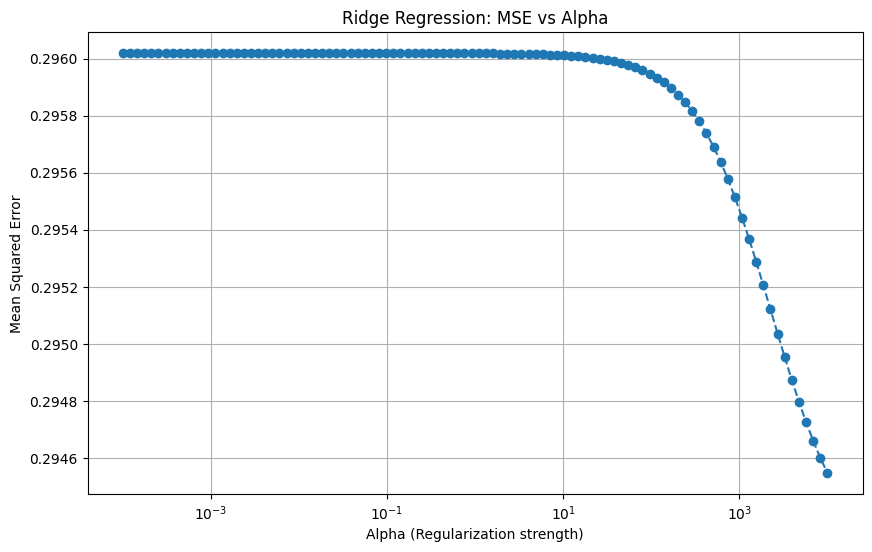

Optimal alpha for Ridge Regression: 10000.000
Minimum MSE for Ridge Regression: 0.295


In [12]:
# بهینه سازی

alphas = np.logspace(-4, 4, 100)
mse_alphas = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    mse_alphas.append(evaluate_model(ridge_model, x, y))

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_alphas, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: MSE vs Alpha')
plt.grid(True)
plt.show()

optimal_alpha = alphas[np.argmin(mse_alphas)]
print(f"Optimal alpha for Ridge Regression: {optimal_alpha:.3f}")
print(f"Minimum MSE for Ridge Regression: {min(mse_alphas):.3f}")
